In [1]:
using LinearAlgebra
using Plots
using Statistics
using CSV
using DataFrames

In [2]:
df = DataFrame(CSV.File("wine.csv"))
df = convert.(Float64, df)

for i=2:size(df)[2]
    mean = Statistics.mean(df[:,i])
    std = Statistics.std(df[:,i])
    for j=1:size(df)[1]
        df[j,i] = (df[j,i] - mean)/std
    end
end

A = Matrix(df[:, 2:size(df)[2]])

U,S,V = svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
178×13 Matrix{Float64}:
 -0.1146      0.0684681  -0.0103305   …   0.0986705    -0.0154414
 -0.076341   -0.0158139  -0.126308        0.0708337     0.000847735
 -0.086958    0.0489109   0.0612588       0.000106472   0.00506251
 -0.129813    0.130744   -0.010982       -0.0441563    -0.0861333
 -0.0348596   0.0412589   0.126323       -0.0395302    -0.0185011
 -0.105392    0.100672   -0.0392301   …  -0.0692272     0.0338383
 -0.0846205   0.055727   -0.060902        0.0257673    -0.0633564
 -0.0711573   0.0763184   0.00911771      0.0692692    -0.0256812
 -0.0867553   0.0435471  -0.110384       -0.115901      0.0331222
 -0.0951429   0.0374456  -0.0613479       0.100407     -0.009897
 -0.120231    0.0617739  -0.026349    …  -0.0148354     0.0285807
 -0.0606299   0.0290281  -0.0742271      -0.0296591     0.0332822
 -0.073024    0.032051   -0.0539206      -0.0163742    -0.00115049
  ⋮                                   ⋱                
  0.083135

In [3]:
normPercent = []
errorVector = []

for i=1:size(S)[1]
    normPercent = [normPercent; norm(U[:, 1:i]*diagm(S)[1:i, 1:i]*V'[1:i, :])/norm(A)]
    errorVector = [errorVector; norm(A - U[:, 1:i]*diagm(S)[1:i, 1:i]*V'[1:i, :])]
end

In [4]:
normPercent

13-element Vector{Any}:
 0.6016547855699842
 0.7443543400621461
 0.8156590518910782
 0.8578985900204019
 0.8953339754278735
 0.9224864013890421
 0.9451814397108833
 0.9592577565272674
 0.9707713312132903
 0.9806615973132958
 0.9894774001183472
 0.996015989380194
 1.0000000000000002

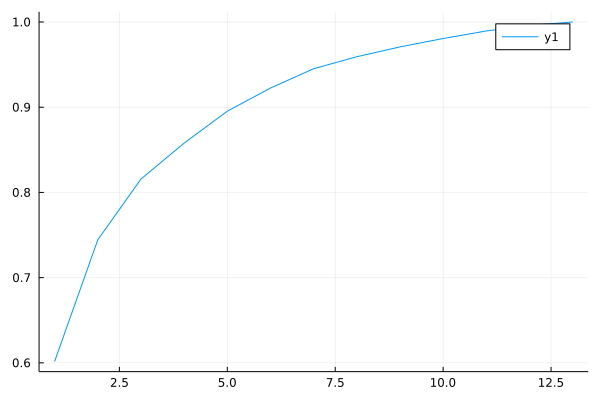

In [5]:
plot(normPercent)

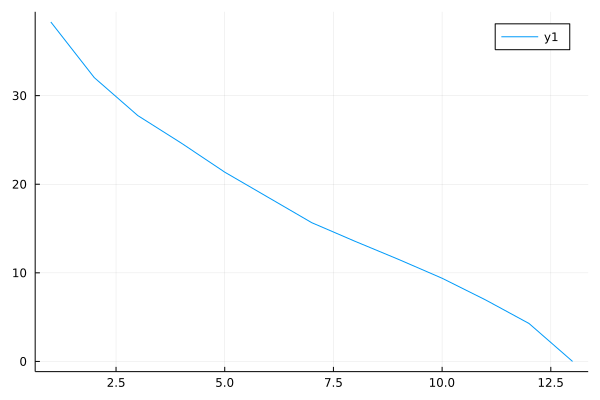

In [6]:
plot(errorVector)

In [8]:
A_transformed = U[:,1:2]*diagm(S)[1:2,1:2]

178×2 Matrix{Float64}:
 -3.30742   1.4394
 -2.20325  -0.332455
 -2.50966   1.02825
 -3.7465    2.74862
 -1.00607   0.867384
 -3.04167   2.11643
 -2.4422    1.17155
 -2.05364   1.60444
 -2.50381   0.915488
 -2.74588   0.787217
 -3.46995   1.29867
 -1.74982   0.610256
 -2.10752   0.673806
  ⋮        
  2.39934   2.58506
  2.92085   1.27086
  2.17528   2.07169
  2.37423   2.58139
  3.20258  -0.250542
  3.66757   0.845363
  2.45862   2.18763
  3.36104   2.21005
  2.59464   1.75229
  2.67031   2.75313
  2.3803    2.29088
  3.19973   2.76113

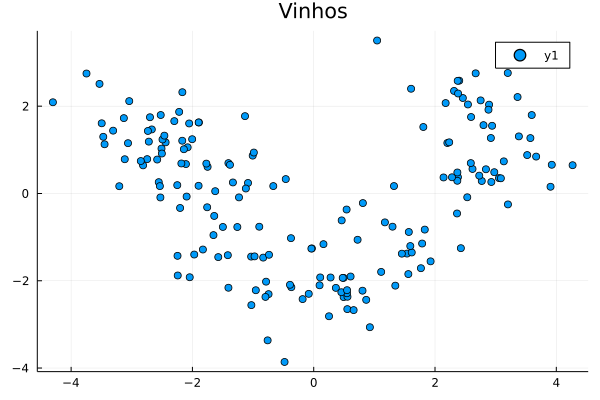

In [9]:
plot((A_transformed'[1,:], A_transformed'[2,:]), seriestype = :scatter, title="Vinhos")

In [10]:
function clusteriza(A,B)
    mA, nA = size(A)
    mB, nB = size(B)
    C = zeros(nB, nA)
    
    for i=1:nA #Iteramos por todas as colunas de A associando cada uma delas a um cluster    
        vC = zeros(nB)
        cluster = 1
        
        #Iteramos por todos os vetores em B procurando pelo que está mais próximo de A e associamos a coluna corrente
        #de A ao cluster de tal vetor.
        for j=2:nB 
            if(norm(A[:, i] - B[:, j]) < norm(A[:, i] - B[:, cluster]))
                cluster = j
            end
        end
        vC[cluster] = 1
        C[:, i] = vC
    end
    
    return C
end

function kmeans(A, k)
    m,n = size(A)
    B = randn(m, k) #Começamos gerando uma base aleatória
    C = clusteriza(A, B) #Encontramos a melhor clusterização para tal base
    norma_anterior = 99999999999999999999 
    while(norm(A - B*C) < norma_anterior) #Realizamos o processo de clusterização até chegar a um mínimo local
        B = (C'\A')'#Achamos a melhor base para as coordenadas encontradas na clusterização
        C = clusteriza(A, B) #Encontramos a melhor clusterização para a base calculada nessa iteração
        norma_anterior = norm(A - B*C) #Calculamos a norma da iteração corrente
    end
    
    return B, C
end

kmeans (generic function with 1 method)

In [15]:
B, C = kmeans(A_transformed', 2)

([-1.311218099690686 2.514959305964103; -0.3963463604966286 0.7602053143951705], [1.0 1.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0])

In [16]:
C

2×178 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [17]:
B

2×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.31122   2.51496
 -0.396346  0.760205

In [18]:
groups = string.(C[1, :])
push!(groups, "media - cluster 0")
push!(groups, "media - cluster 1")

180-element Vector{String}:
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 "1.0"
 ⋮
 "0.0"
 "0.0"
 "0.0"
 "0.0"
 "0.0"
 "0.0"
 "0.0"
 "0.0"
 "0.0"
 "0.0"
 "media - cluster 0"
 "media - cluster 1"

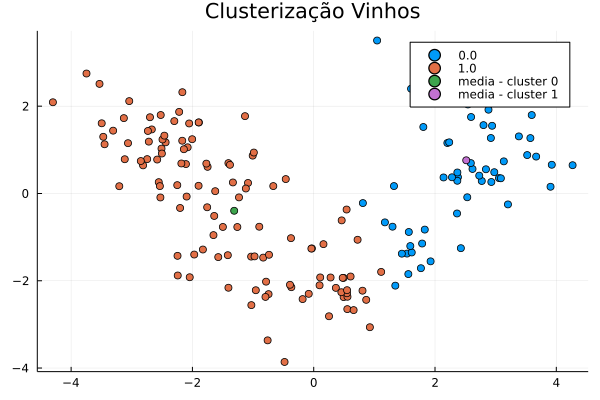

In [20]:
plot(([A_transformed'[1, :]' B[1,:]']', [A_transformed'[2,:]' B[2,:]']'), group=groups, seriestype = :scatter, title="Clusterização Vinhos")